In [2]:
import pyathena as pa
from pyathena.tigress_ncr.ncr_paper_lowz import LowZData
from pyathena.tigress_ncr.ncr_paper_lowz import get_PW_zprof
import matplotlib.pyplot as plt
import cmasher as cmr
from labellines import labelLines

In [3]:
plt.style.use('ncr-paper.mplstyle')
plt.rcParams['font.size']=12

In [4]:
pdata = LowZData()

LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rs

R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4-b10 LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy10

In [282]:
pdata.mgroup.keys()

dict_keys(['R8-S30', 'R8-b10', 'R8-b1', 'LGR8-S05', 'LGR4-S100', 'LGR4-b10', 'LGR4-b1', 'LGR2-S150-Om200', 'LGR2-S150-Om100q0', 'R8', 'LGR4', 'LGR2-S150'])

In [285]:
m = pdata.mgroup['LGR2-S150'][1]

In [286]:
m

'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8'

In [287]:
hst_basedir = "lowZ-hst-data"

f = os.path.join(hst_basedir, f"{m}_hst.nc")
with xr.open_dataset(f) as dset:
    hst = dset

In [288]:
s = pdata.sa.set_model(m)

In [289]:
files = sorted(glob.glob(os.path.join(s.savdir,"stress","*.nc")))
stress = []
for f in files:
    with xr.open_dataset(f) as dset:
        stress.append(dset)

In [290]:
d = xr.concat(stress,dim='time')
time=[float(os.path.basename(f).split('.')[1]) for f in files]
d = d.assign_coords(time=np.array(time)*s.par['output2']['dt'])
d = d.mean(dim='z')*s.domain['Lx'][2]*s.u.Lsun

In [291]:
def plot_quantile(data,x='z',qmid=0.5,qmin=0.25,qmax=0.75,**kwargs):
    qd = data.quantile(dim='time',q=[qmin,0.5,qmax])
    if qmid == 'mean':
        l,=plt.plot(qd[x], data.mean(dim='time'),**kwargs)
    else:
        l,=plt.plot(qd[x], qd.sel(quantile=0.5),**kwargs)
    plt.fill_between(qd[x], qd.sel(quantile=qmin),qd.sel(quantile=qmax),color=l.get_color(),alpha=0.25,lw=0)

In [292]:
d['total'] = d['Rxy']+d['Mxy']+d['Gxy']

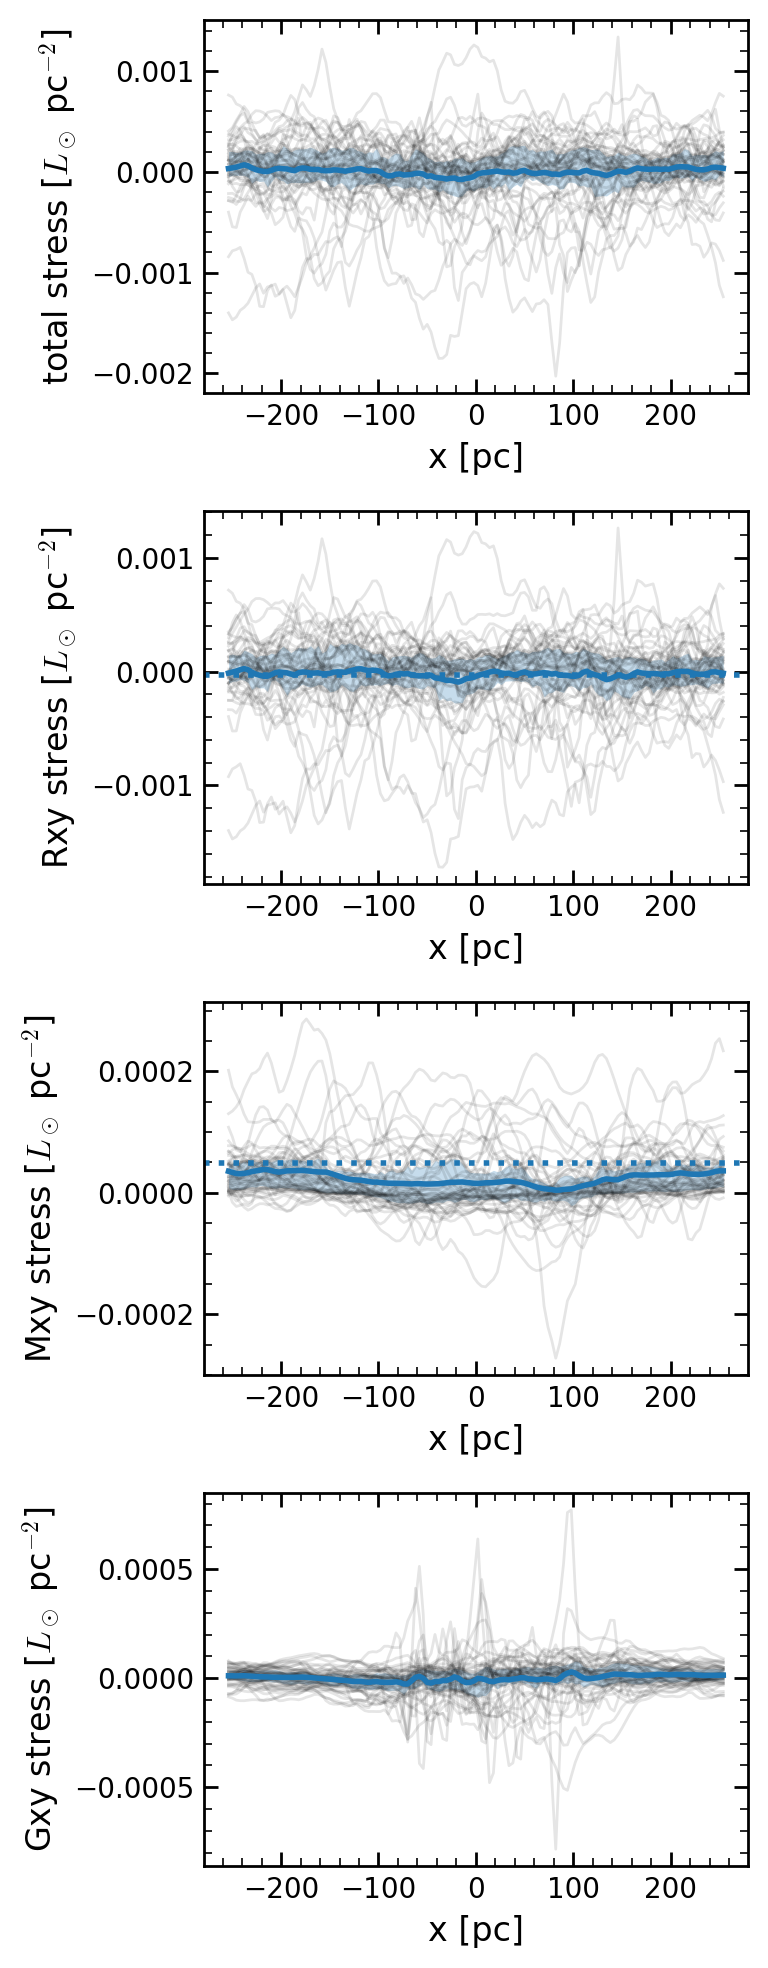

In [293]:
fig, axes = plt.subplots(4,1, figsize=(4,10))

for ax,f in zip(axes,['total','Rxy','Mxy','Gxy']):
    plt.sca(ax)
    plt.plot(d['x'],d[f].T,color='k',alpha=0.1,lw=1)
    plot_quantile(d[f],x='x',qmid='mean')
    if f in ['Rxy','Mxy']:
        plt.axhline(hst[f].mean(),ls=':')
    plt.xlabel('x [pc]')
    plt.ylabel(f'{f} stress [$L_\\odot$ pc$^{{-2}}$]')
plt.tight_layout()

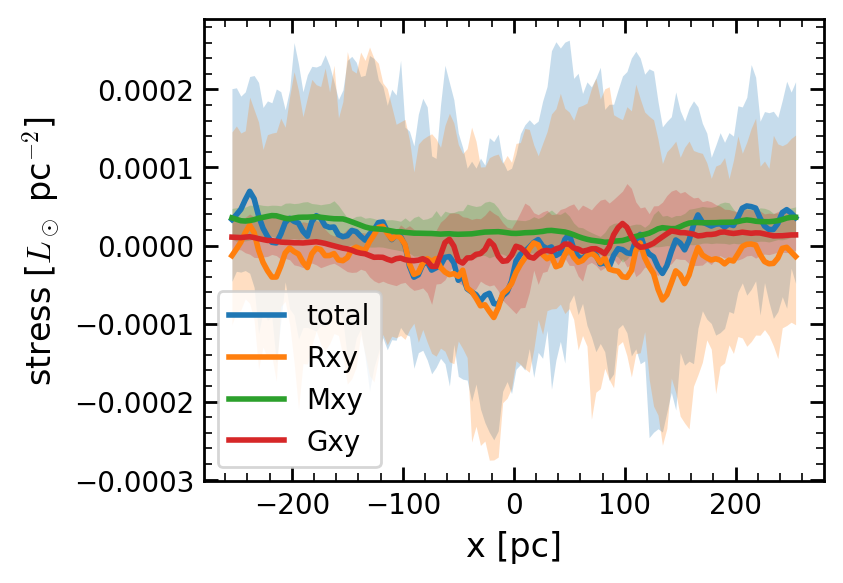

In [294]:
plt.figure(figsize=(4,3))
for ax,f in zip(axes,['total','Rxy','Mxy','Gxy']):
    # plt.sca(ax)
    # plt.plot(d['x'],d[f].T,color='k',alpha=0.1,lw=1)
    plot_quantile(d[f],x='x',qmid='mean',label=f)
plt.xlabel('x [pc]')
plt.ylabel(f'stress [$L_\\odot$ pc$^{{-2}}$]')
plt.legend()

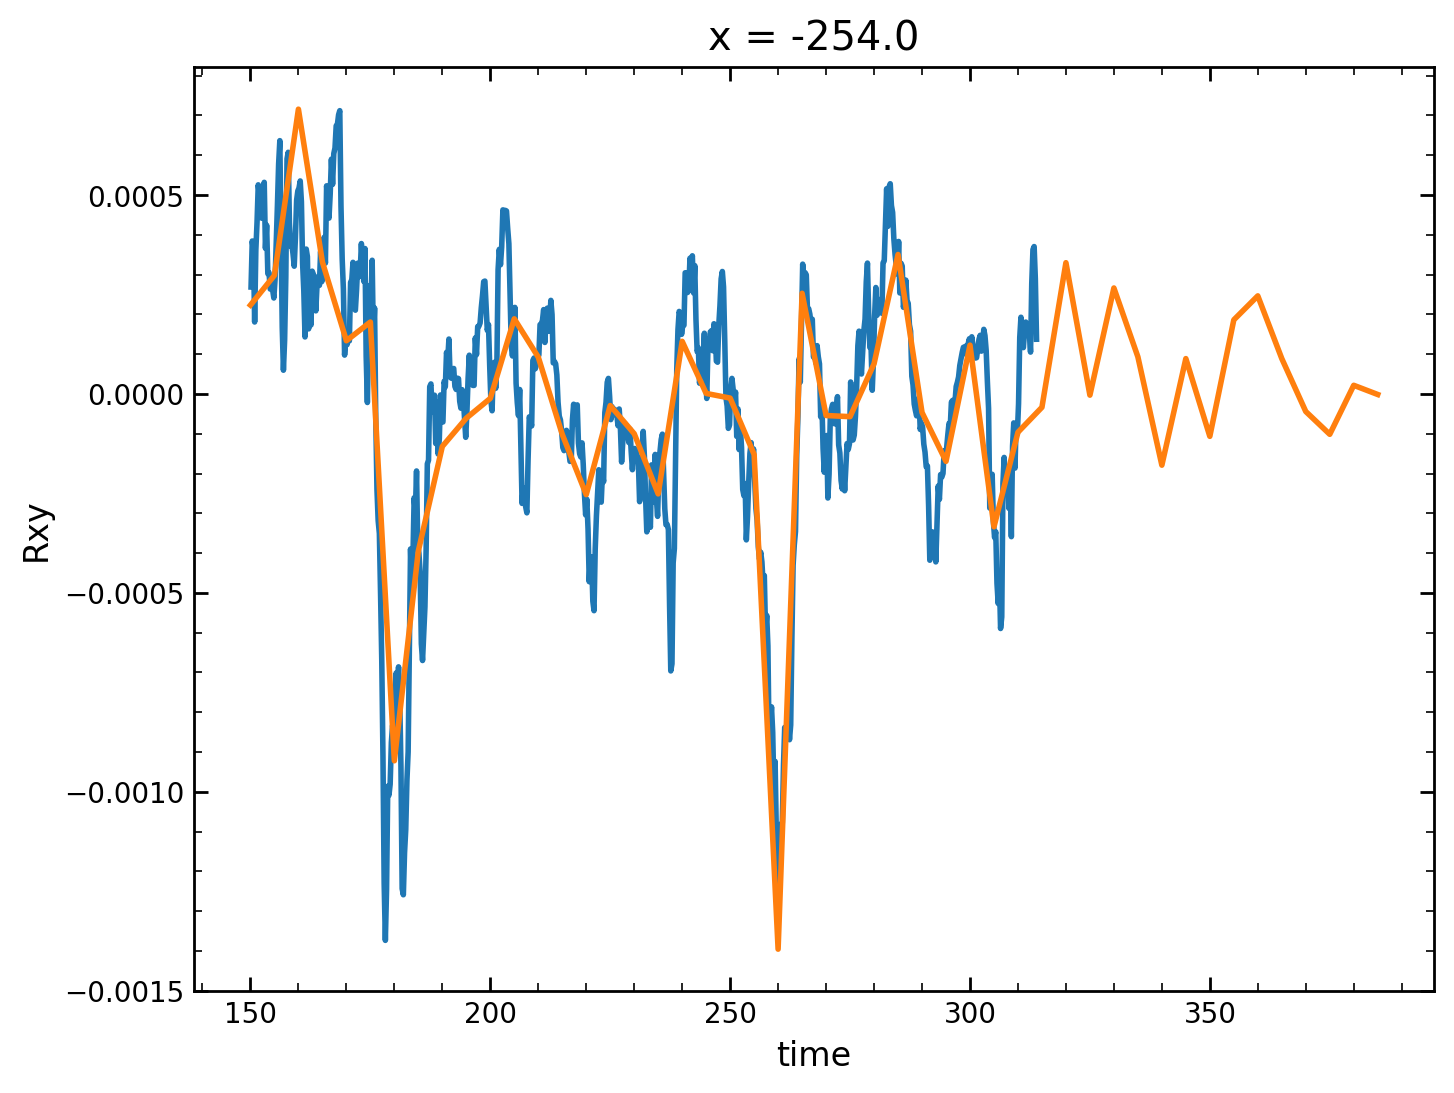

In [296]:
hst['Rxy'].plot()
(d['Rxy'].sel(x=-1024,method='nearest')).plot()

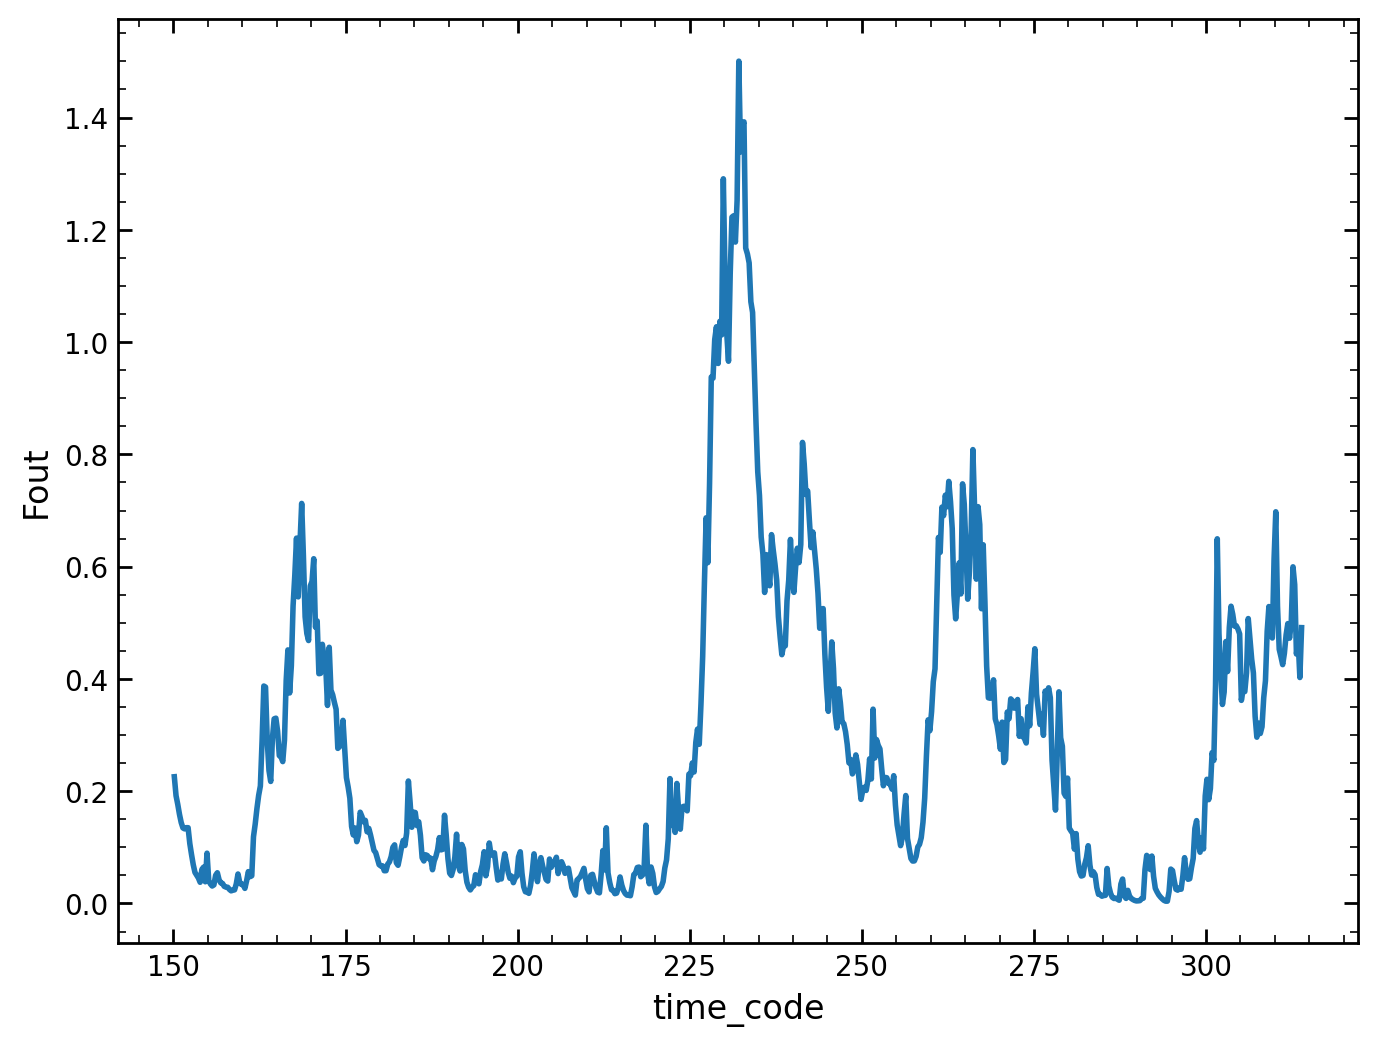

In [311]:
hst['Fout'].plot()

In [312]:
zp = s.read_zprof(phase='whole')

In [329]:
[k for k in list(zp.keys()) if ('FzE' in k) & ('Fztidal' in k) ]

['pFzE1',
 'pFzE2',
 'pFzE3',
 'pFzEge',
 'pFzEgsg',
 'pFzEtidal',
 'mFzE1',
 'mFzE2',
 'mFzE3',
 'mFzEge',
 'mFzEgsg',
 'mFzEtidal']

In [330]:
FzEg = zp['pFzEge']+zp['mFzEge']+zp['pFzEgsg']+zp['mFzEgsg']+zp['pFzEtidal']+zp['mFzEtidal']

In [331]:
Fzupper = (FzEg).sel(z=zp.z.max())
Fzlower = (FzEg).sel(z=zp.z.min())

In [332]:
Fz = Fzupper-Fzlower

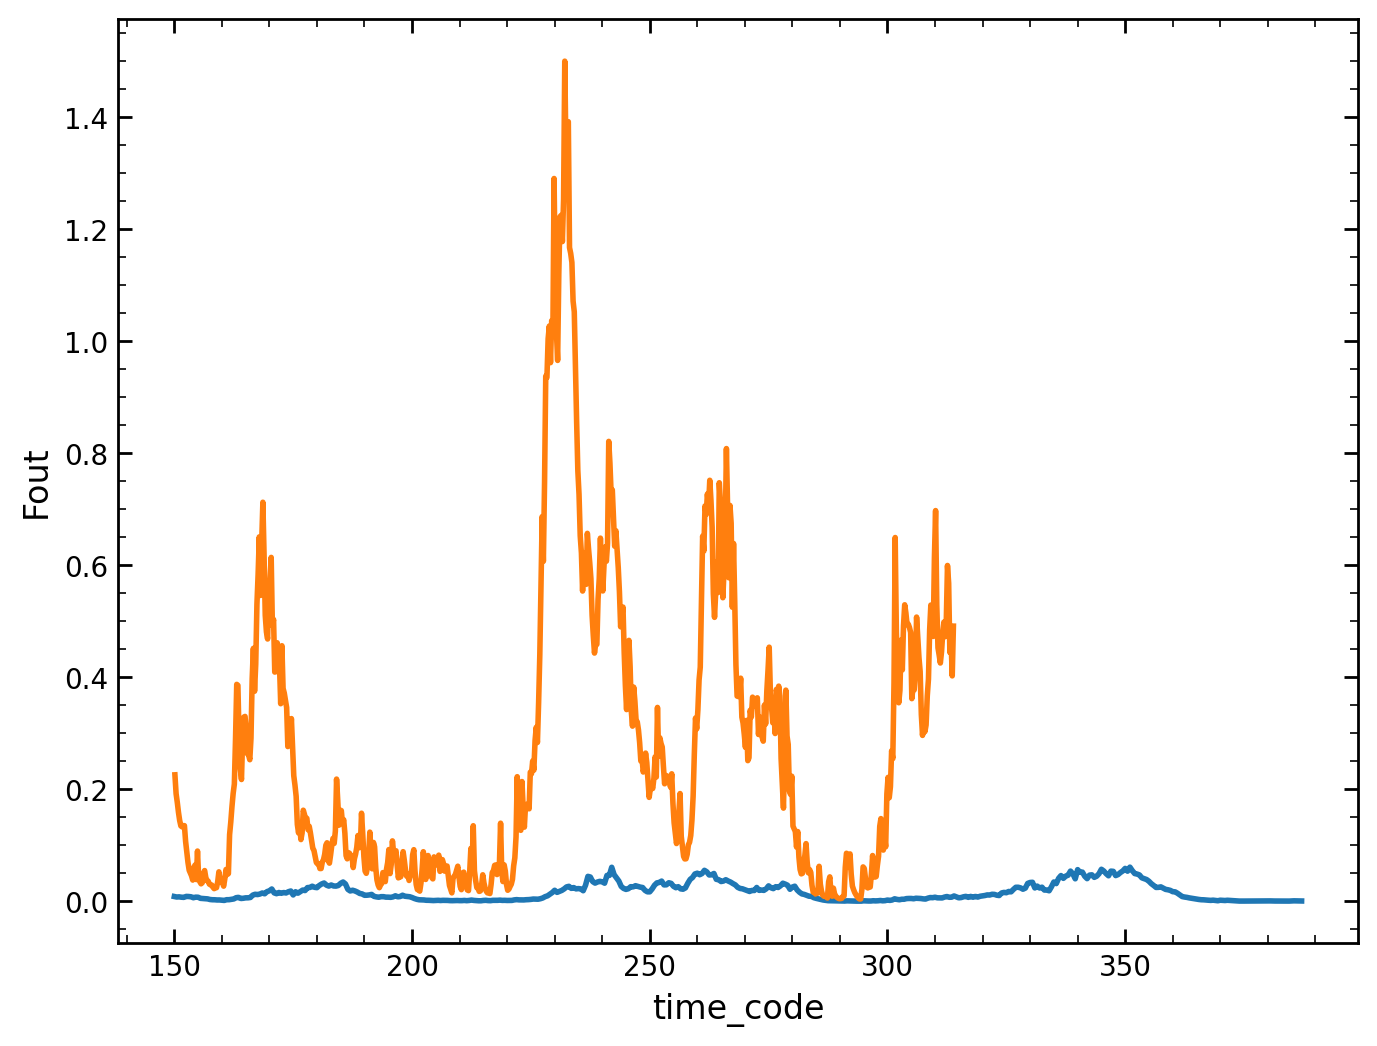

In [335]:
(Fz*s.u.Lsun).plot(x='time_code')
hst['Fout'].plot()